# Understanding the Data
We have rat data walking on a spinning treadmill. The speed of the spinning wheel can be adjusted and the rat is practically encouraged to match the speed of the spinning this way. The neural spiking data of the rat's motor cortex has been gathered from this activity of rat treading at different speeds. In each trial of the experiment involves rat moving at different speed. there is an acceleration period in the beginning of the trial. and then the wheel starts spinning at constant speed the relatio between the rate speed and the angular velocity is given as:
 `v = rw`
 where `V `is the speed of the rat and `w` is the angular velocity and `r` is the radius of the spinning treadmill.

# Framing the Question
* Understanding the link between motor cortex spiking activity and the speed at which the rat is moving
* Developing an understanding of the neural data and behavior
* Finding causal link between the two variables of interest (spiking data and the behavior)
* Find if there is a link between the execution of the activity or the motor preparation  pretaining to the behavior.
* Take the neuroplasticity phenomenon into consideration.

We want to investigate whether the spike activity of on neuron level or the neuron population level changes in sync with the rat speed.

The initial question is as follows:
(What) The motor cortex neural activity (when) in a certain condition of the rat can be causally linked with its state of motion.

# Testing Hypothesis
We hypothesize that there is a significant difference in the motor cortex neural activity during different motion speeds.
Additionally, we would like to confirm whether it is population activity or single neuro responses  that are key to testing this hypothesis
The corticospinal tract carries motor signals from the primary motor cortex in the brain, down the spinal cord, to the muscles of the trunk and limbs. Thus, this tract is involved in the voluntary movement of muscles of the body.
Thus, the simplest causal model of cortex to limb muscle routing can be represented as shown in the figure below:
<!--- (![routing locomotion model](resources/simplfied_causal_model_1.png)/>)--->
<p align ="center">
<img src="resources/simplfied_causal_model_1.png" width="600" > </p>

# ideal scenario

track a freely moving mouse, estimate pose and record the neural data in that time.
then segment times when the rat was running and collect data for that time window.

# Assumptions:
1.  Spinning wheel has high torque therefore, it is assumed that the spinning speed was maintaned at a constant and rat weight and locomotion did not change it considerably.
2.  each trial we will take neurons from only one channel this will give us the highest probability that we are recording the data from same neurons
3.  if we are having good spike data from more than 1 channel then we will assume that  the sorted units in both of the channels are separate neurons
4.  THe speed of rat is modelled as the torque equal but opposite to the wheel rotation. torque is directly propotional to the force. so given the rotational force of the wheel, the force applied by the mouse for running/walking can be modelled as the force generated by wheel * friction constant. given that the coofficient of friction of the wheel does not change and is constant. means there is a linear relation between the wheel spinning and the velocity of rat therefore it cancels out and wheel spinning give a good estimate of the rat speed.


In [187]:
from pypl2 import pl2_ad, pl2_spikes, pl2_events, pl2_info, pl2_comments
import sys
import os
import numpy as np

# Hurdles faced during Preprocessing of recorded Neural Data
* Data is locked behind premium commercial softwares
* Limited functionality
* No Full control access
* Little to no customization
* Not suitable for prototyping and R&D

# Section 1: Loading Plexon Data in Python

In [188]:
def choose_file():
    try:
        import tkinter
    except ImportError:
        print("Tkinter not installed.")
        exit()

    from tkinter import filedialog

    #Suppress the Tkinter root window
    tkroot = tkinter.Tk()
    tkroot.withdraw()

    return str(tkinter.filedialog.askopenfilename())

In [189]:
filename1 = r'D:\Research_Material\Neural Data\sorted data\2022_10_26_M6_A1_R5_T560.pl2'
filename2 = 'data/20221026M6A1R5T560-2-01.pl2'

# Section 2: printing information about different channels

Getting information about how data is stored inside the PL2 file and how we can access the sorted neural waveforms that are saved in channel `SPK_SPKC08`

 # Get file info and print out interesting information


In [190]:
def ad_channels_info(filename):
    spkinfo, evtinfo, adinfo = pl2_info(filename)
    print("\nContinuous A/D Channel Info from pl2_info()")
    print("\n# Channel Name\tCount")
    print("- ------------\t-----")
    for n in range(len(adinfo)):
        print("{} {}\t{}".format(adinfo[n].channel, adinfo[n].name, adinfo[n].n))

    print("\nSpike Channel Info from pl2_info()")
    print("\n# Channel Name\tUnit A\tUnit B\tUnit C\tUnit D\tUnsorted")
    print("- ------------\t------\t------\t------\t------\t--------")
    for n in range(len(spkinfo)):
        print("{} {}\t{}\t{}\t{}\t{}\t{}".format(spkinfo[n].channel,
                                                   spkinfo[n].name,
                                                   spkinfo[n].units[1],
                                                   spkinfo[n].units[2],
                                                   spkinfo[n].units[3],
                                                   spkinfo[n].units[4],
                                                   spkinfo[n].units[0]))

    print("\nEvent Channel Info from pl2_info()")
    print("\n# Channel Name\tCount")
    print("- ------------\t-----")

ad_channels_info(filename2)


Continuous A/D Channel Info from pl2_info()

# Channel Name	Count
- ------------	-----
1 WB01	3722009
2 WB02	3722009
3 WB03	3722009
4 WB04	3722009
5 WB05	3722009
6 WB06	3722009
7 WB07	3722009
8 WB08	3722009
9 WB09	3722009
10 WB10	3722009
11 WB11	3722009
12 WB12	3722009
13 WB13	3722009
14 WB14	3722009
15 WB15	3722009
16 WB16	3722009
1 SPKC01	3722009
2 SPKC02	3722009
3 SPKC03	3722009
4 SPKC04	3722009
5 SPKC05	3722009
6 SPKC06	3722009
7 SPKC07	3722009
8 SPKC08	3722009
9 SPKC09	3722009
10 SPKC10	3722009
11 SPKC11	3722009
12 SPKC12	3722009
13 SPKC13	3722009
14 SPKC14	3722009
15 SPKC15	3722009
16 SPKC16	3722009
1 FP01	93050
2 FP02	93050
3 FP03	93050
4 FP04	93050
5 FP05	93050
6 FP06	93050
7 FP07	93050
8 FP08	93050
9 FP09	93050
10 FP10	93050
11 FP11	93050
12 FP12	93050
13 FP13	93050
14 FP14	93050
15 FP15	93050
16 FP16	93050

Spike Channel Info from pl2_info()

# Channel Name	Unit A	Unit B	Unit C	Unit D	Unsorted
- ------------	------	------	------	------	--------
1 SPK01	0	0	0	0	0
2 SPK02	0	0	

In [191]:
def channel_info(channel, filename):

    spkinfo, evtinfo, adinfo = pl2_info(filename)
    for n in range(len(evtinfo)):
        print("{} {}\t{}".format(evtinfo[n].channel, evtinfo[n].name, evtinfo[n].n))

    ###########################################
    # pl2_ad, pl2_spikes, pl2_events Examples #
    ###########################################

    #Get continuous a/d data on first channel and print out interesting information
    ad = pl2_ad(filename, channel= channel )
    if ad.n == 0:
        pass
    else:
        print("\nContinuous A/D Channel 0 Data from pl2_ad()")
        print("\nFrequency Number of Points First Four A/D Points (mV)")
        print("--------- ---------------- ---------------------")
        print("{:<10}{:<17}{}, {}, {}, {}".format(int(ad.adfrequency),
                                            ad.n,
                                            ad.ad[0] * 1000,
                                            ad.ad[1] * 1000,
                                            ad.ad[2] * 1000,
                                            ad.ad[3] * 1000))

channel_info(channel=7, filename=filename1)


Continuous A/D Channel 0 Data from pl2_ad()

Frequency Number of Points First Four A/D Points (mV)
--------- ---------------- ---------------------
40000     2886009          0.0, 0.0, 0.0, 0.0


# Get spikes on a channel and print out interesting information on the first four spikes.

In [192]:
#Get spikes on first channel and print out interesting information on the first four spikes.
channel = 'SPK08'
def channel_info(channel, filename):
    spikes = pl2_spikes(filename, channel= channel)
    print(f"\nSpike Channel {channel} Data for First Four Waveforms from pl2_spikes()")
    print("\nTimestamps (s) Unit First Four Waveform Points (uV)")
    print("-------------- ---- -------------------------------")
    x = spikes.timestamps
    for n in range(10):
        print("{:<15}{:<5}{}, {}, {}, {}".format(spikes.timestamps[n],
                                           spikes.units[n],
                                           spikes.waveforms[n][0] * 1000000,
                                           spikes.waveforms[n][1] * 1000000,
                                           spikes.waveforms[n][2] * 1000000,
                                           spikes.waveforms[n][3] * 1000000))

    #Get event data on select channels and print out interesting information
    print("\nEvent Data from pl2_events()")
    print("\nEvent   Number of Events First Timestamp (s)")
    print("------- ---------------- -------------------")

channel_info(channel, filename=filename2)


Spike Channel SPK08 Data for First Four Waveforms from pl2_spikes()

Timestamps (s) Unit First Four Waveform Points (uV)
-------------- ---- -------------------------------
0.001525       0    -2.44140625, -1.4822823660714286, -7.760184151785714, -11.204310825892858
0.004825       0    10.942731584821429, 11.509486607142858, 11.335100446428571, 7.367815290178572
0.00655        0    7.280622209821429, 9.940011160714286, 4.403250558035714, -8.326939174107142
0.00795        0    -25.591169084821427, -25.80915178571429, -26.55029296875, -27.683803013392858
0.010825       0    1.7874581473214286, -5.275181361607142, -12.773786272321429, -14.561244419642858
0.0156         0    12.555803571428571, 5.885532924107143, -4.2724609375, -6.931849888392858
0.019675       0    -8.065359933035715, -11.160714285714286, -10.811941964285714, -11.378696986607142
0.031625       0    3.5313197544642856, 5.405970982142857, 8.326939174107142, 5.929129464285714
0.037575       0    5.972726004464286, 3.0953543

# Section 3: Exploring the data in SPK_SPKC08 channel

In [193]:
def get_spikes(channel, filename):
    spikes = pl2_spikes(filename, channel= channel)
    return spikes

In [194]:
spk_08_spikes = get_spikes(channel='SPK_SPKC08', filename=filename1)
len(spk_08_spikes.units)

771

In [195]:
spk_08_spikes_2 = get_spikes("SPK08", filename2)
len(spk_08_spikes_2.units)

30481

In [196]:
type(spk_08_spikes)

pypl2.pypl2api.PL2Spikes

In [197]:
import numpy as np
spk_08_spike_times =  np.array(spk_08_spikes.timestamps)
spk_08_spikes_times_2 = np.array(spk_08_spikes_2.timestamps)

In [198]:
spk_08_spike_times.shape

(771,)

In [223]:
import matplotlib.pyplot as plt
def plot_isis(single_neuron_isis):
  plt.hist(single_neuron_isis, bins=35, histtype="stepfilled", fc=(89/255, 193/255, 189/255, 1))
  plt.axvline(single_neuron_isis.mean(), color="orange", label="Mean ISI")
  plt.xlabel("ISI duration (s)")
  plt.ylabel("Number of spikes")
  plt.legend()

# Collecting information about the identity of each Unit/Neuron and Separating them
> units with value *`0`* are the unsorted waveforms
>  while any other values correspond to the waveforms of a particular neuron/unit

In [200]:
spike_units = np.array(spk_08_spikes.units)
spike_units_2 = np.array(spk_08_spikes_2.units)

In [201]:
np.unique(spike_units)

array([0, 1, 2, 3])

In [202]:
def extract_unit_ind(spike_unit):
    units = np.unique(spike_units)
    index = []
    for n in units:
        index.append(np.where(spike_unit==n))
    return index

ind =  extract_unit_ind(spike_units)
ind2 = extract_unit_ind(spike_units_2)

In [203]:
unsorted_index = np.where(spike_units==0)
index = np.where(spike_units==1)
index_B = np.where(spike_units==2)
index_C = np.where(spike_units==3)

In [204]:
Unsorted = spk_08_spike_times[ind[0]]
Unit_B = spk_08_spike_times[ind[2]]
Unit_A = spk_08_spike_times[ind[1]]
Unit_C = spk_08_spike_times[ind[3]]

Unsorted_2 = spk_08_spikes_times_2[ind2[0]]
Unit_B_2 = spk_08_spikes_times_2[ind2[2]]
Unit_A_2 = spk_08_spikes_times_2[ind2[1]]
Unit_C_2 = spk_08_spikes_times_2[ind2[3]]


In [205]:
isis_Unit_A = np.diff(Unit_A)
isis_Unit_B = np.diff(Unit_B)
isis_Unit_C = np.diff(Unit_C)
isis_Unit_0 = np.diff(Unsorted)

isis_Unit_A_2 = np.diff(Unit_A_2)
isis_Unit_B_2 = np.diff(Unit_B_2)
isis_Unit_C_2 = np.diff(Unit_C_2)
isis_Unit_0_2= np.diff(Unsorted_2)

# Summary of PL2 Plexon File data:

<p align ="center">
<img src="resources/Raw PL2 data.png" width="900" > </p>

# Plotting Inter Spike Interval of all Units
* From the ISI distribution of each of the unit we can see that it closely resembles the ISI distribution of a Neuron spiking. However, from our sorting software we know that the unsorted waveforms might not belong to a neuron or it can have high signal-to-noise ratio.
* Merely looking at the ISI distribution curve is not enough to deduce that the specific data is coming from a particular neuron or

![sorted and filtered waveforms](resources/sorting.png)


# Inter-spike intervals and their distributions
Scientific questions are informed by existing models. So, what knowledge do we already have that can inform questions about this data?

We know that there are physical constraints on neuron spiking. Spiking costs energy, which the neuron’s cellular machinery can only obtain at a finite rate. Therefore neurons should have a refractory period: they can only fire as quickly as their metabolic processes can support, and there is a minimum delay between consecutive spikes of the same neuron.

More generally, we can ask “how long does a neuron wait to spike again?” or “what is the longest a neuron will wait?” Can we transform spike times into something else, to address questions like these more directly?

We can consider the inter-spike times (or interspike intervals: ISIs). These are simply the time differences between consecutive spikes of the same neuron.

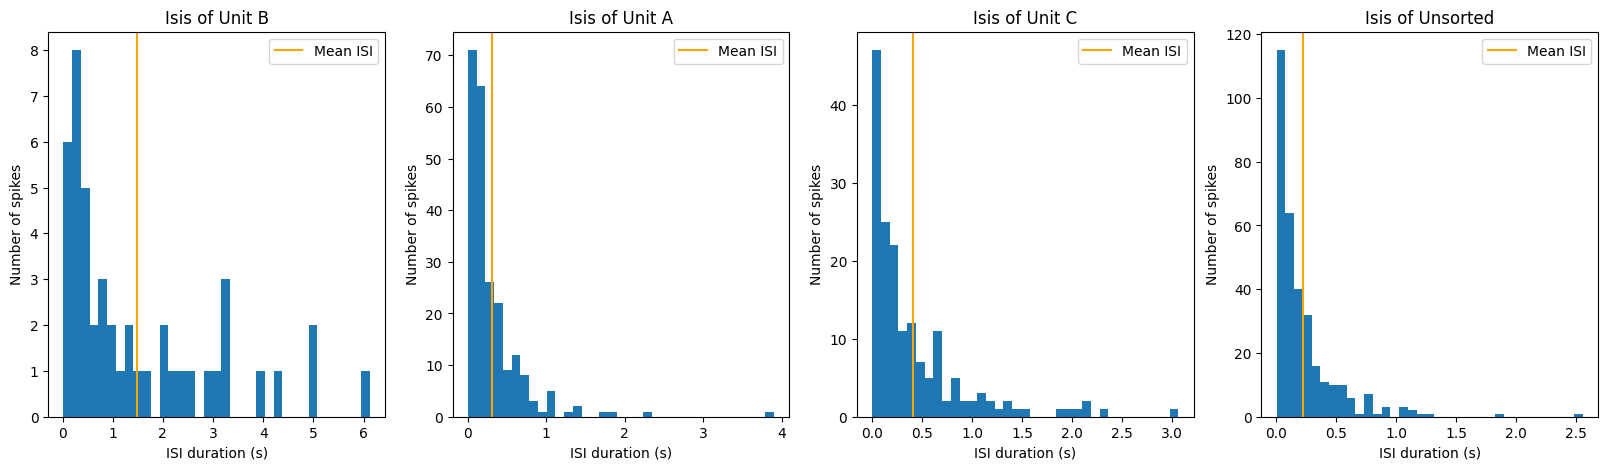

In [206]:
plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plot_isis(isis_Unit_B)
plt.title('Isis of Unit B')
#plt.plot([1,2,3,4])
plt.subplot(1,4,2)
#plt.plot([1,2,3,4])
plot_isis(isis_Unit_A)
plt.title('Isis of Unit A')
plt.subplot(1,4,3)
#plt.plot([1,2,3,4])
plot_isis(isis_Unit_C)
plt.title('Isis of Unit C')
plt.subplot(1,4,4)
plot_isis(isis_Unit_0)
plt.title('Isis of Unsorted')
plt.show()

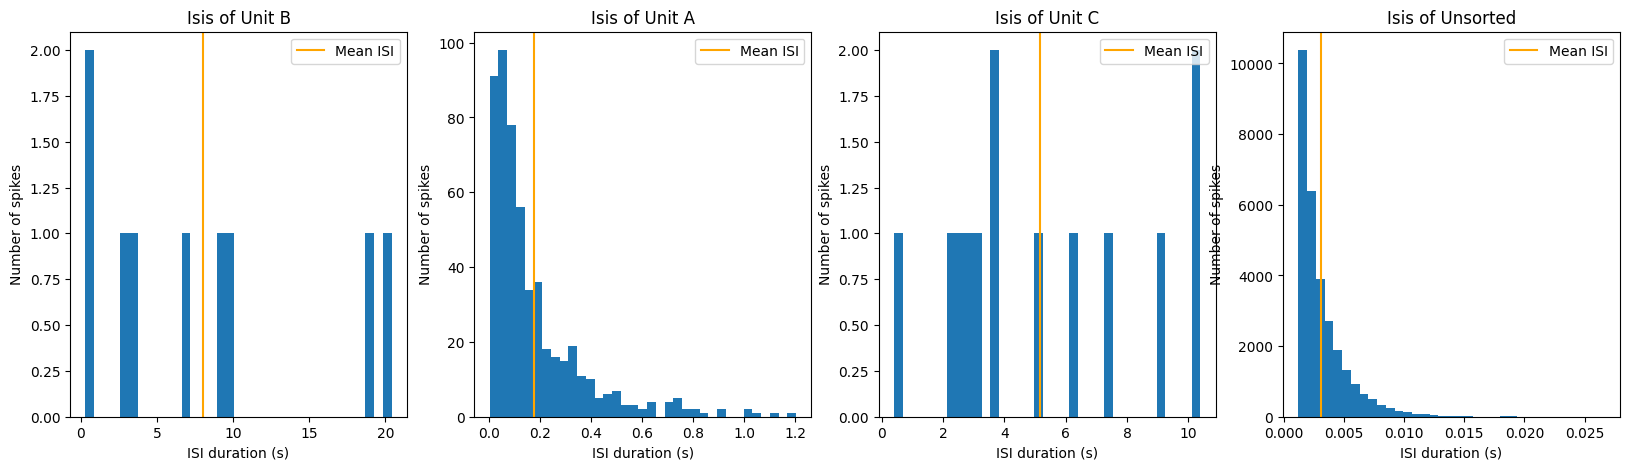

In [207]:
plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plot_isis(isis_Unit_B_2)
plt.title('Isis of Unit B')
#plt.plot([1,2,3,4])
plt.subplot(1,4,2)
#plt.plot([1,2,3,4])
plot_isis(isis_Unit_A_2)
plt.title('Isis of Unit A')
plt.subplot(1,4,3)
#plt.plot([1,2,3,4])
plot_isis(isis_Unit_C_2)
plt.title('Isis of Unit C')
plt.subplot(1,4,4)
plot_isis(isis_Unit_0_2)
plt.title('Isis of Unsorted')
plt.show()

# Why ISI distribution of neuron is exponential?
we know that the typical ISI distribution of signal neuron look like an exponential model. But why the neuron ISI distribution has to be exponential? it could be uniform, gaussian or any other. The brain does this to maximize the information transfer. if we look at the entropy of different distribution we find that exponential distribution in most of the cases has the highest entropy among other distribution. so brain treats it as an optimization problem and figure out a spiker interval mechanism that maximizes information while keeping the spiking numbers lower. because neurons spend energy while spiking and there is a refractory period when neurons cannot spike. the ISI is limited by the laws of nature. and the metabolic reactions happening in the body

# Waveform Inspection

As we can see from the plottede figure of the `unsorted` and `Unit_A` waveforms.  `Unit_A` waveform corresponds to the characteristic waveform of a neruon spiking. however the `unsorted` waveform is seems noisy and below certain threshold. therefore, it is safe to disregard the unsorted spike data as it may contain noise as well spiking data from not just one but several neurons.

Text(0.5, 1.0, 'Unit_A')

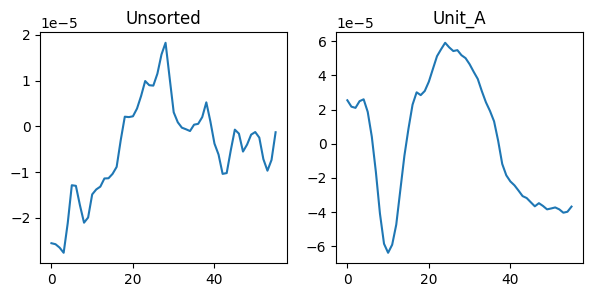

In [208]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.plot(spk_08_spikes_2.waveforms[np.array(ind2[0])[0,3]])
plt.title('Unsorted')
plt.subplot(1,2,2)
plt.plot(spk_08_spikes_2.waveforms[np.array(ind2[1])[0,3]])
plt.title('Unit_A')

# Plotting Spike Trains of the Sorted Units
Spike trains for a given interval of time

In [209]:
def restrict_spike_times(spike_times, interval):

    """Given a spike_time dataset, restrict to spikes within given interval.

    Args:
    spike_times (sequence of np.ndarray): List or array of arrays,
      each inner array has spike times for a single neuron.
    interval (tuple): Min, max time values; keep min <= t < max.

    Returns:
    np.ndarray: like `spike_times`, but only within `interval`
    """
    interval_spike_times = []
    for Unit in spike_times:
        spikes = Unit
        interval_mask = (spikes >= interval[0]) & (spikes < interval[1])
        interval_spike_times.append(spikes[interval_mask])
    return np.array(interval_spike_times, object)

In [210]:
interval_spike_times = restrict_spike_times([Unit_A, Unit_B, Unit_C], (0,20))
interval_spike_times_2 = restrict_spike_times([Unit_A_2, Unit_B_2, Unit_C_2],(0,20))

([], [])

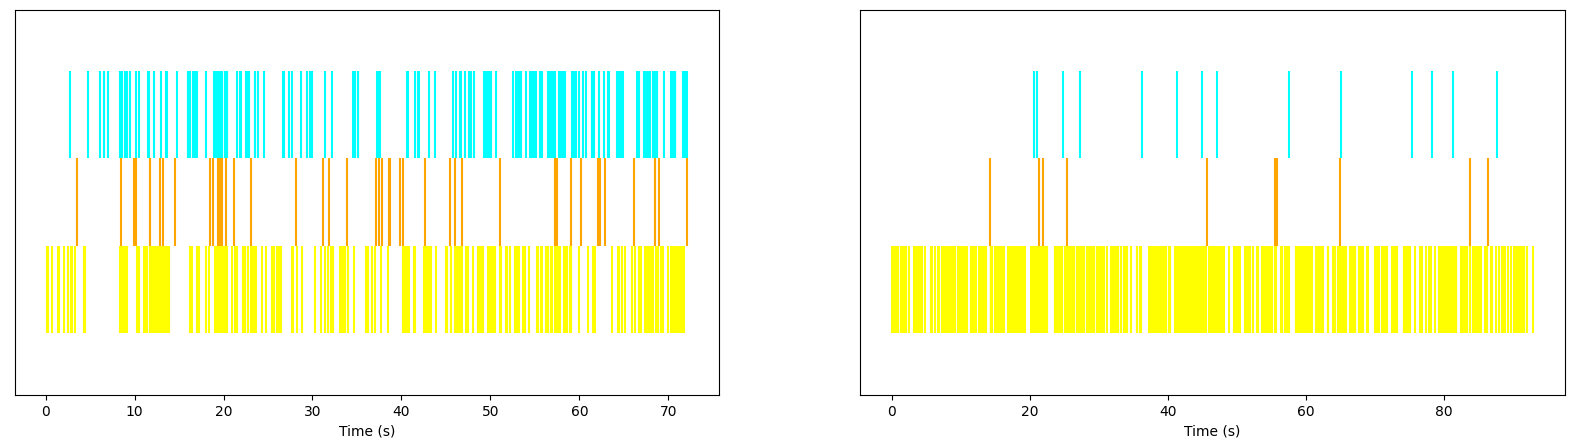

In [211]:
#spike_t = np.array(neuron_spikes.timestamps)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.eventplot([Unit_A, Unit_B, Unit_C], color= ['yellow', 'orange', 'cyan'])
plt.xlabel("Time (s)")
plt.yticks([])
plt.subplot(1,2,2)
plt.eventplot([Unit_A_2, Unit_B_2, Unit_C_2], color= ['yellow', 'orange', 'cyan'])
plt.xlabel("Time (s)")
plt.yticks([])

In [212]:
spike_data = np.array([Unit_A, Unit_B, Unit_C], dtype=object)
spike_data.shape

(3,)

In [213]:
n_neurons = len(spike_data)
total_spikes_per_neuron = [len(spike) for spike in spike_data]
print(f"The total number of neurons is {n_neurons}\nTotal Number of spikes for each neuron is {total_spikes_per_neuron}")

The total number of neurons is 3
Total Number of spikes for each neuron is [229, 47, 169]


In [214]:
spike_data = np.array([Unit_A_2, Unit_B_2, Unit_C_2], dtype=object)
n_neurons = len(spike_data)
total_spikes_per_neuron = [len(spike) for spike in spike_data]
print(f"The total number of neurons is {n_neurons}\nTotal Number of spikes for each neuron is {total_spikes_per_neuron}")

The total number of neurons is 3
Total Number of spikes for each neuron is [534, 10, 14]


In [16]:
import os.path
Data_Dir = r'D:\Research_Material\Neural Data\SD-PLEXON\Trials'
M6 = 'M6'
M10 = 'M10'
M6_trials = os.listdir(os.path.join(Data_Dir, M6))
M10_trials = os.listdir(os.path.join(Data_Dir, M10))

In [140]:
M6_path = os.path.join(Data_Dir, M6)
spikes = list([])
units = list([])
spike_times = list([])
neurons_spike_times = list([])
for j, trial in enumerate(M6_trials):
    files = os.listdir(os.path.join(M6_path, trial))
    file_dir = os.path.join(M6_path, trial)
    for i, file in enumerate(files):
            spkinfo , _, _ = pl2_info(os.path.join(file_dir, file))
            spike_channels = np.array(spkinfo)[:,1]
            if "SPK08" in spike_channels:
                spikes.append(get_spikes('SPK08', os.path.join(file_dir, file)))
                units.append(spikes[i+(j*5)].units)
                spike_times.append(spikes[i+(j*5)].timestamps)
                neurons_spike_times.append(np.array(spike_times[i+(j*5)])[np.array(np.where(np.array(units[i+(j*5)])!=0))])

C:\Users\pc\AppData\Local\Temp\ipykernel_68432\3308436642.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_channels = np.array(spkinfo)[:,1]


In [141]:
for i in range(30):
    print(len(neurons_spike_times[i].squeeze()))

594
536
442
431
377
414
373
443
425
416
516
389
357
313
361
1649
1573
1455
1727
1395
1513
1432
1336
1373
1391
970
946
865
950
2121


In [146]:
neurons_spike_times_interveled = []
for neuron in range(len(neurons_spike_times)):
    neurons_spike_times_interveled.append(restrict_spike_times(neurons_spike_times[neuron], (0,70)))

In [143]:
len(neurons_spike_times_interveled)

30

In [ ]:
spikes = np.array(spikes, dtype='object')

In [ ]:
len(spikes[22][list(spikes[22].units)!=0])

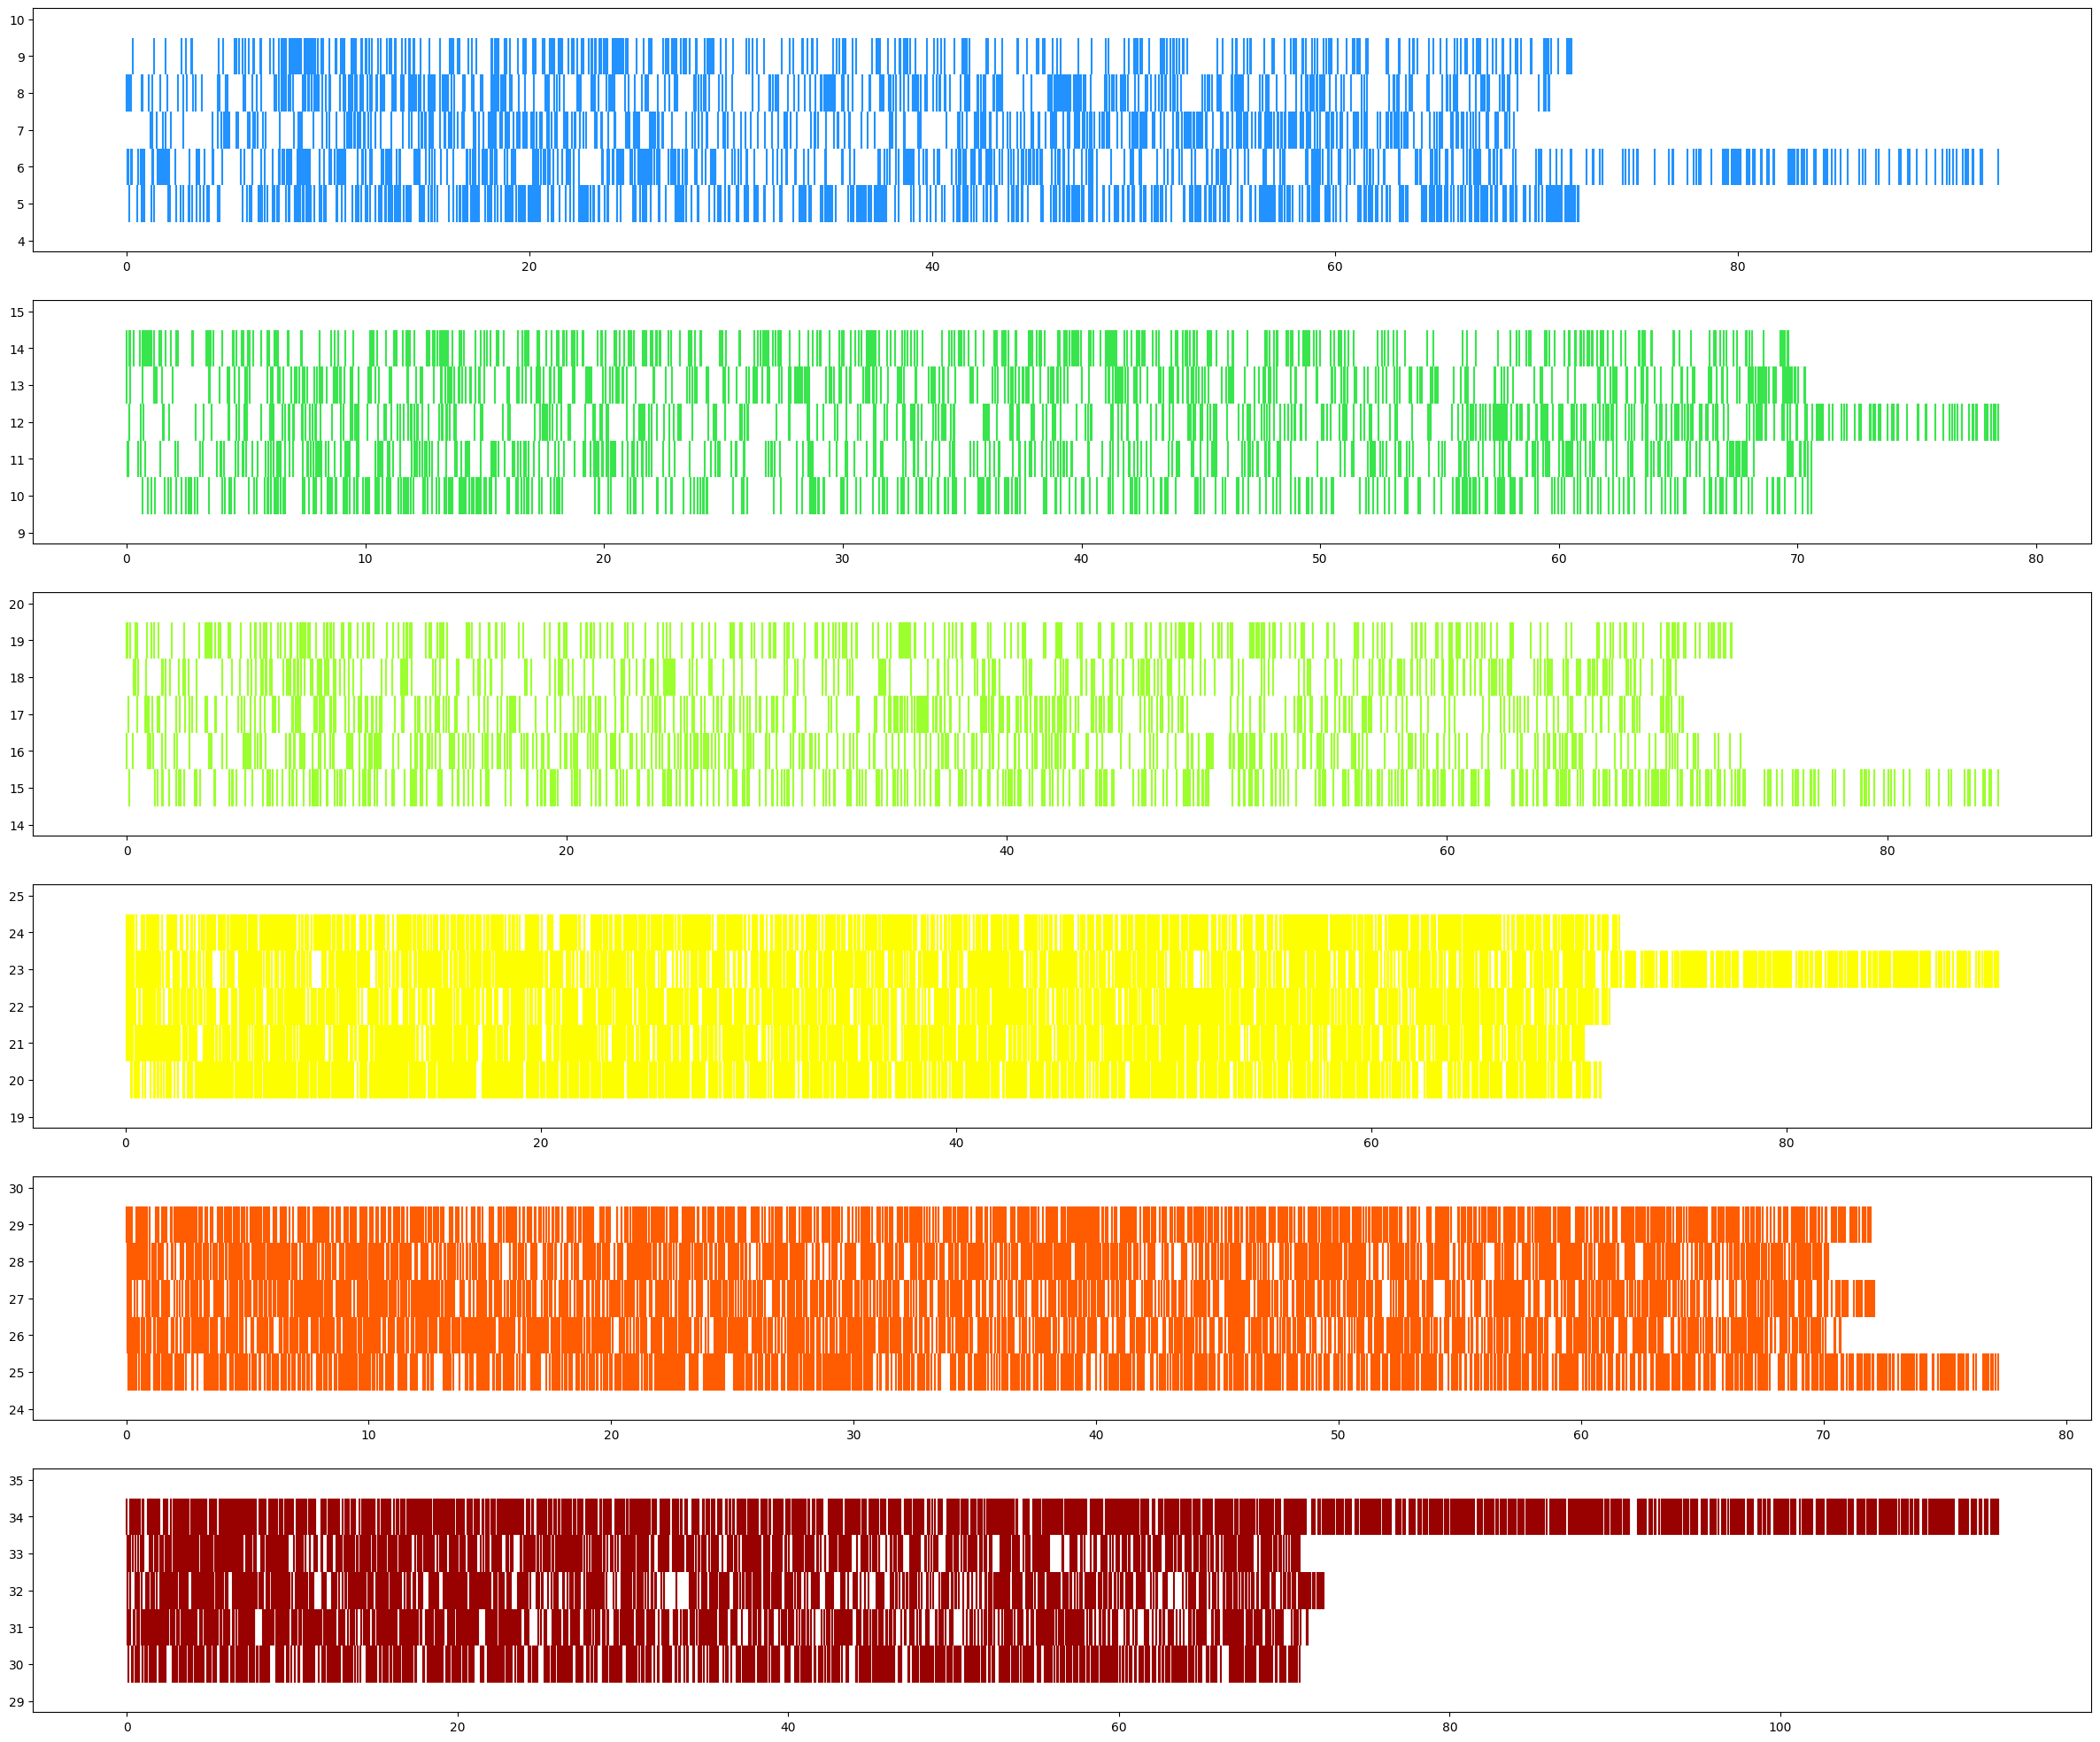

In [145]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6,figsize=(30,25))
for i in np.arange(0,5):
    ax[0].eventplot(np.array(neurons_spike_times[i]), lineoffsets=[i+5], colors='#2192FF')
for i in np.arange(5,10):
    ax[1].eventplot(np.array(neurons_spike_times[i]), lineoffsets=[i+5], colors='#38E54D')
for i in np.arange(10,15):
    ax[2].eventplot(np.array(neurons_spike_times[i]), lineoffsets=[i+5], colors='#9CFF2E')
for i in np.arange(15,20):
    ax[3].eventplot(np.array(neurons_spike_times[i]), lineoffsets=[i+5], colors='#FDFF00')
for i in np.arange(20,25):
    ax[4].eventplot(np.array(neurons_spike_times[i]), lineoffsets=[i+5], colors='#FF5B00')
for i in np.arange(25,30):
    ax[5].eventplot(np.array(neurons_spike_times[i]), lineoffsets=[i+5], colors='#990000')

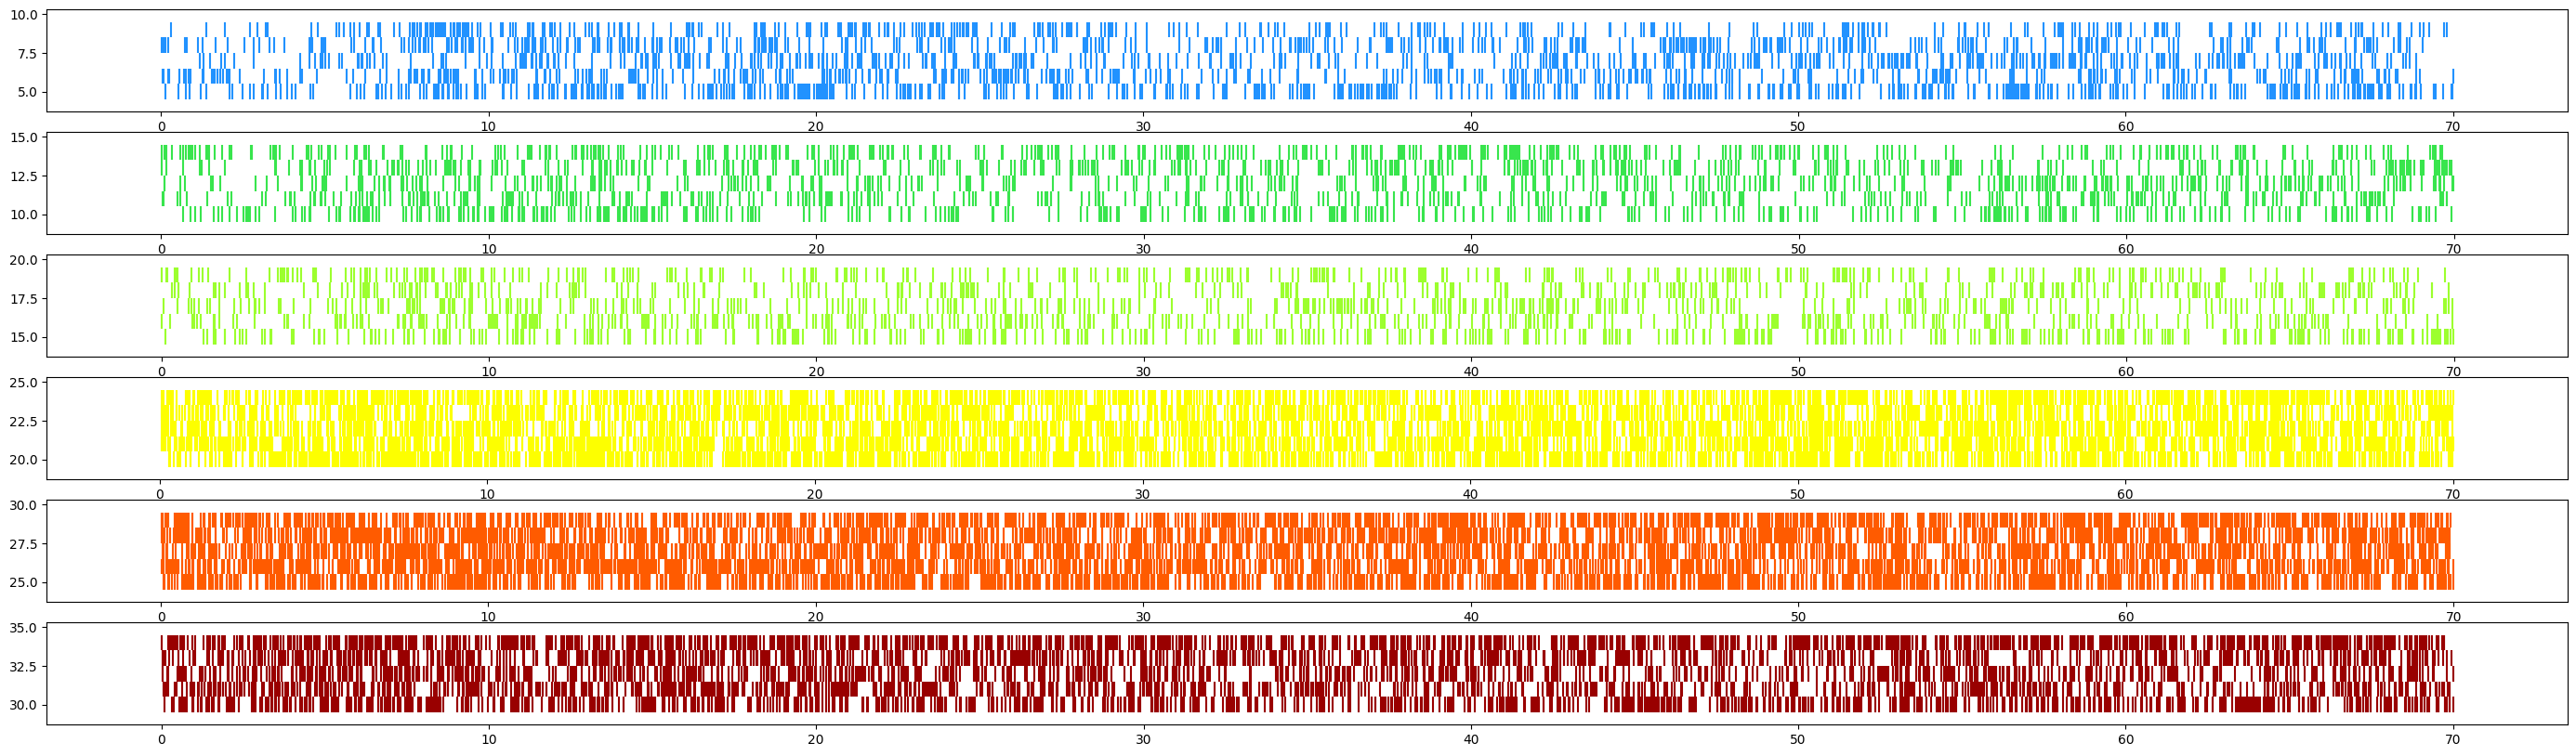

In [149]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6,figsize=(35,10))
for i in np.arange(0,5):
    ax[0].eventplot(np.array(neurons_spike_times_interveled[i]), lineoffsets=[i+5], colors='#2192FF')
for i in np.arange(5,10):
    ax[1].eventplot(np.array(neurons_spike_times_interveled[i]), lineoffsets=[i+5], colors='#38E54D')
for i in np.arange(10,15):
    ax[2].eventplot(np.array(neurons_spike_times_interveled[i]), lineoffsets=[i+5], colors='#9CFF2E')
for i in np.arange(15,20):
    ax[3].eventplot(np.array(neurons_spike_times_interveled[i]), lineoffsets=[i+5], colors='#FDFF00')
for i in np.arange(20,25):
    ax[4].eventplot(np.array(neurons_spike_times_interveled[i]), lineoffsets=[i+5], colors='#FF5B00')
for i in np.arange(25,30):
    ax[5].eventplot(np.array(neurons_spike_times_interveled[i]), lineoffsets=[i+5], colors='#990000')

In [152]:
M10_path = os.path.join(Data_Dir, M10)
spikes_01 = list([])
units_01 = list([])
spike_times_01 = list([])
neurons_spike_times_01 = list([])
for j, trial in enumerate(M10_trials):
    files = os.listdir(os.path.join(M10_path, trial))
    file_dir = os.path.join(M10_path, trial)
    for i, file in enumerate(files):
        spkinfo , _, _ = pl2_info(os.path.join(file_dir, file))
        spike_channels = np.array(spkinfo)[:,1]
        if "SPK10" in spike_channels:
            spikes_01.append(get_spikes('SPK10', os.path.join(file_dir, file)))
            units_01.append(spikes_01[i+(j*5)].units)
            spike_times_01.append(spikes_01[i+(j*5)].timestamps)
            neurons_spike_times_01.append(np.array(spike_times_01[i+(j*5)])[np.array(np.where(np.array(units_01[i+(j*5)])!=0))])

C:\Users\pc\AppData\Local\Temp\ipykernel_68432\1767100570.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_channels = np.array(spkinfo)[:,1]


In [153]:
for i in range(30):
    print(len(neurons_spike_times_01[i].squeeze()))

1740
2409
1740
1645
1574
1788
1906
1791
1875
1953
1871
1900
2738
1785
1861
2036
2020
2072
2062
1631
2186
2230
2416
2123
0
0
0
0
0
0


In [156]:
neurons_spike_times_interveled_01 = []
for neuron in range(len(neurons_spike_times_01)):
    neurons_spike_times_interveled_01.append(restrict_spike_times(neurons_spike_times_01[neuron], (0,10)))

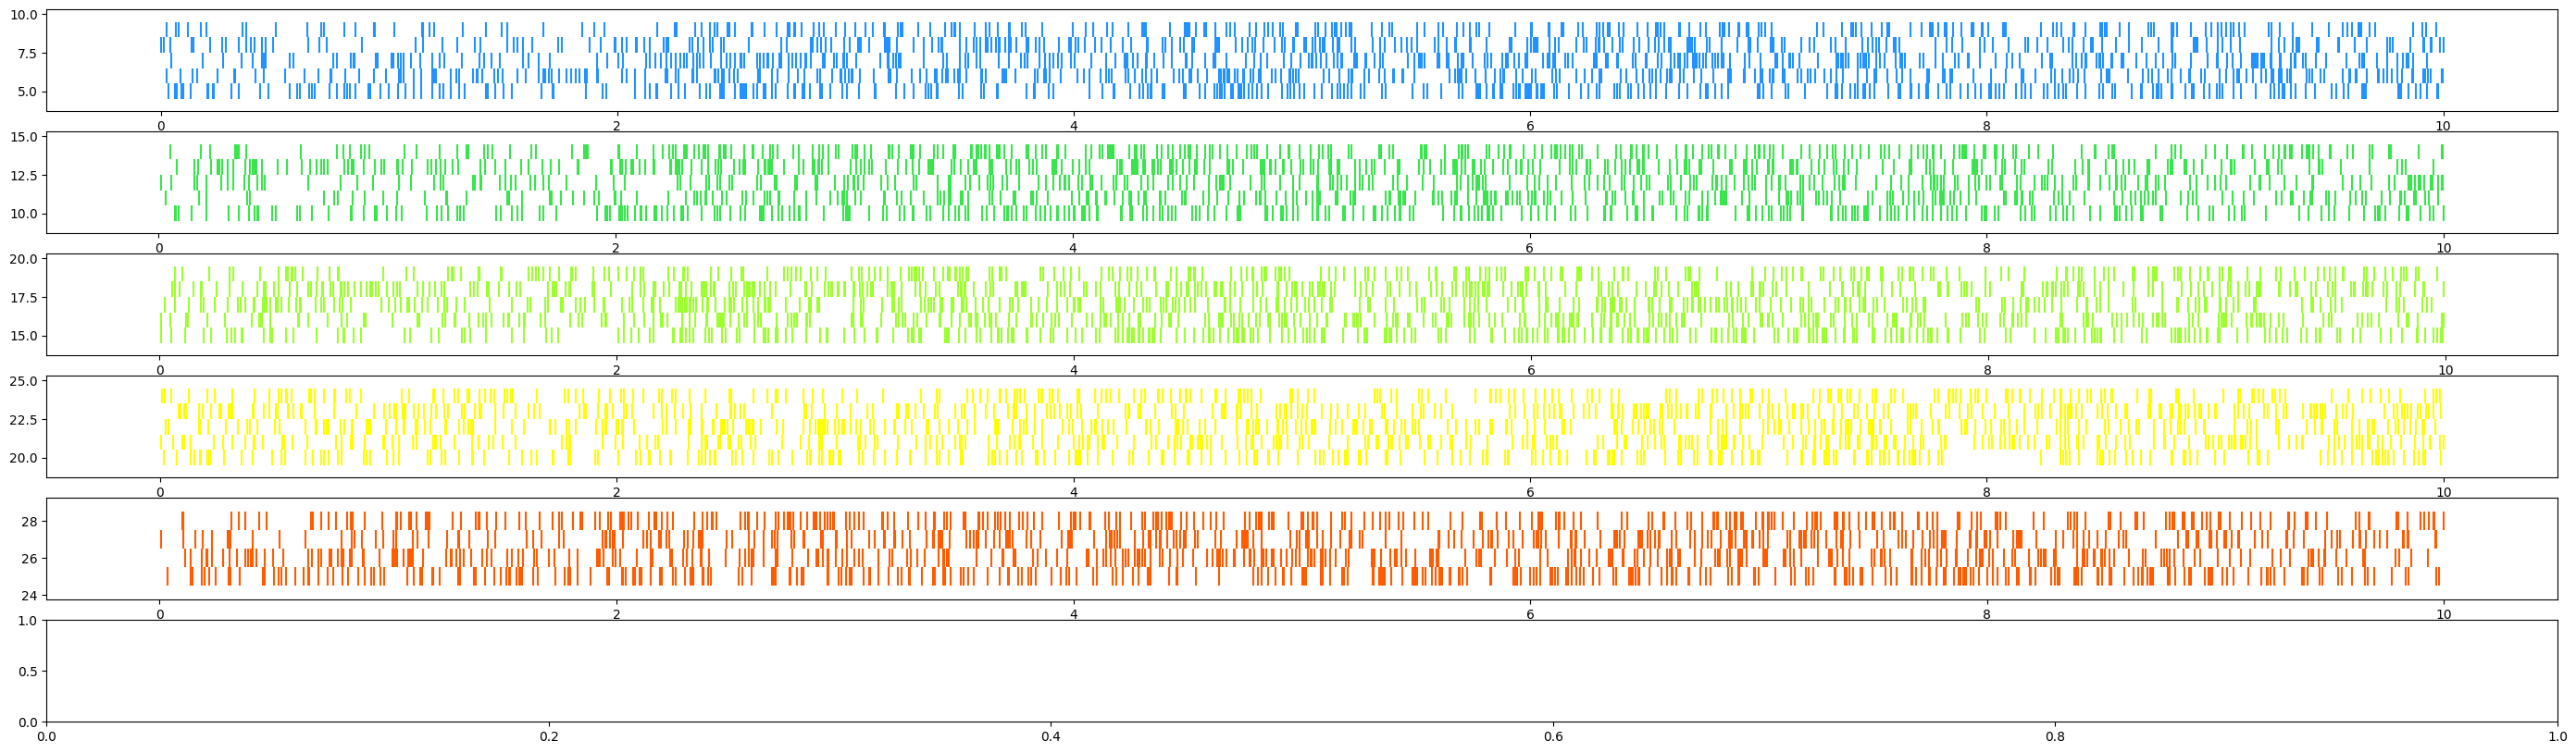

In [157]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6,figsize=(35,10))
for i in np.arange(0,5):
    ax[0].eventplot(np.array(neurons_spike_times_interveled_01[i]), lineoffsets=[i+5], colors='#2192FF')
for i in np.arange(5,10):
    ax[1].eventplot(np.array(neurons_spike_times_interveled_01[i]), lineoffsets=[i+5], colors='#38E54D')
for i in np.arange(10,15):
    ax[2].eventplot(np.array(neurons_spike_times_interveled_01[i]), lineoffsets=[i+5], colors='#9CFF2E')
for i in np.arange(15,20):
    ax[3].eventplot(np.array(neurons_spike_times_interveled_01[i]), lineoffsets=[i+5], colors='#FDFF00')
for i in np.arange(20,25):
    ax[4].eventplot(np.array(neurons_spike_times_interveled_01[i]), lineoffsets=[i+5], colors='#FF5B00')
for i in np.arange(25,30):
    ax[5].eventplot(np.array(neurons_spike_times_interveled_01[i]), lineoffsets=[i+5], colors='#990000')

In [159]:
isi = []
for i in range(len(neurons_spike_times)):
    isi.append(np.diff(neurons_spike_times[i]))

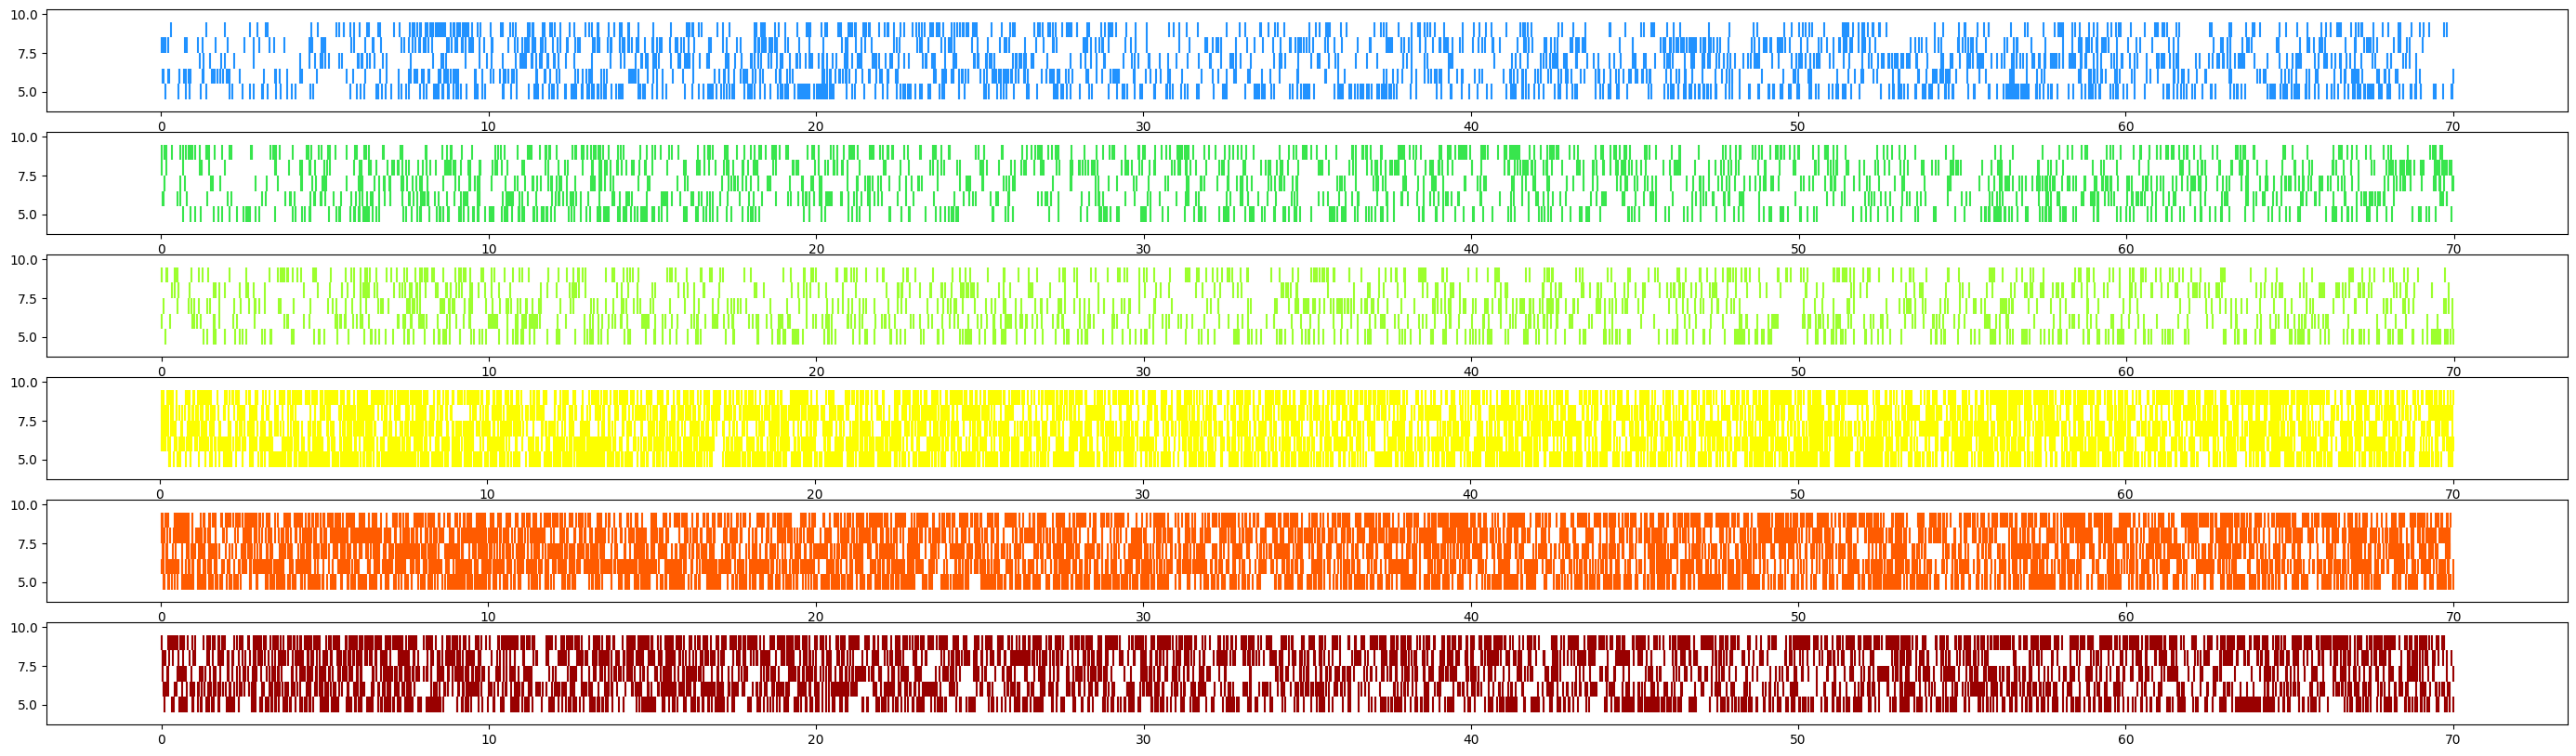

In [165]:
import matplotlib.pyplot as plt
colors = ['2192FF',
          '38E54D',
          '9CFF2E',
          'FDFF00',
          'FF5B00',
          '990000']
fig, ax = plt.subplots(6,figsize=(35,10))
for j in range(6):
    for i in np.arange(0,5):
        #print(j, i+(j*5))
        ax[j].eventplot(np.array(neurons_spike_times_interveled[i+(j*5)]), lineoffsets=[i+5], colors='#'+colors[j])

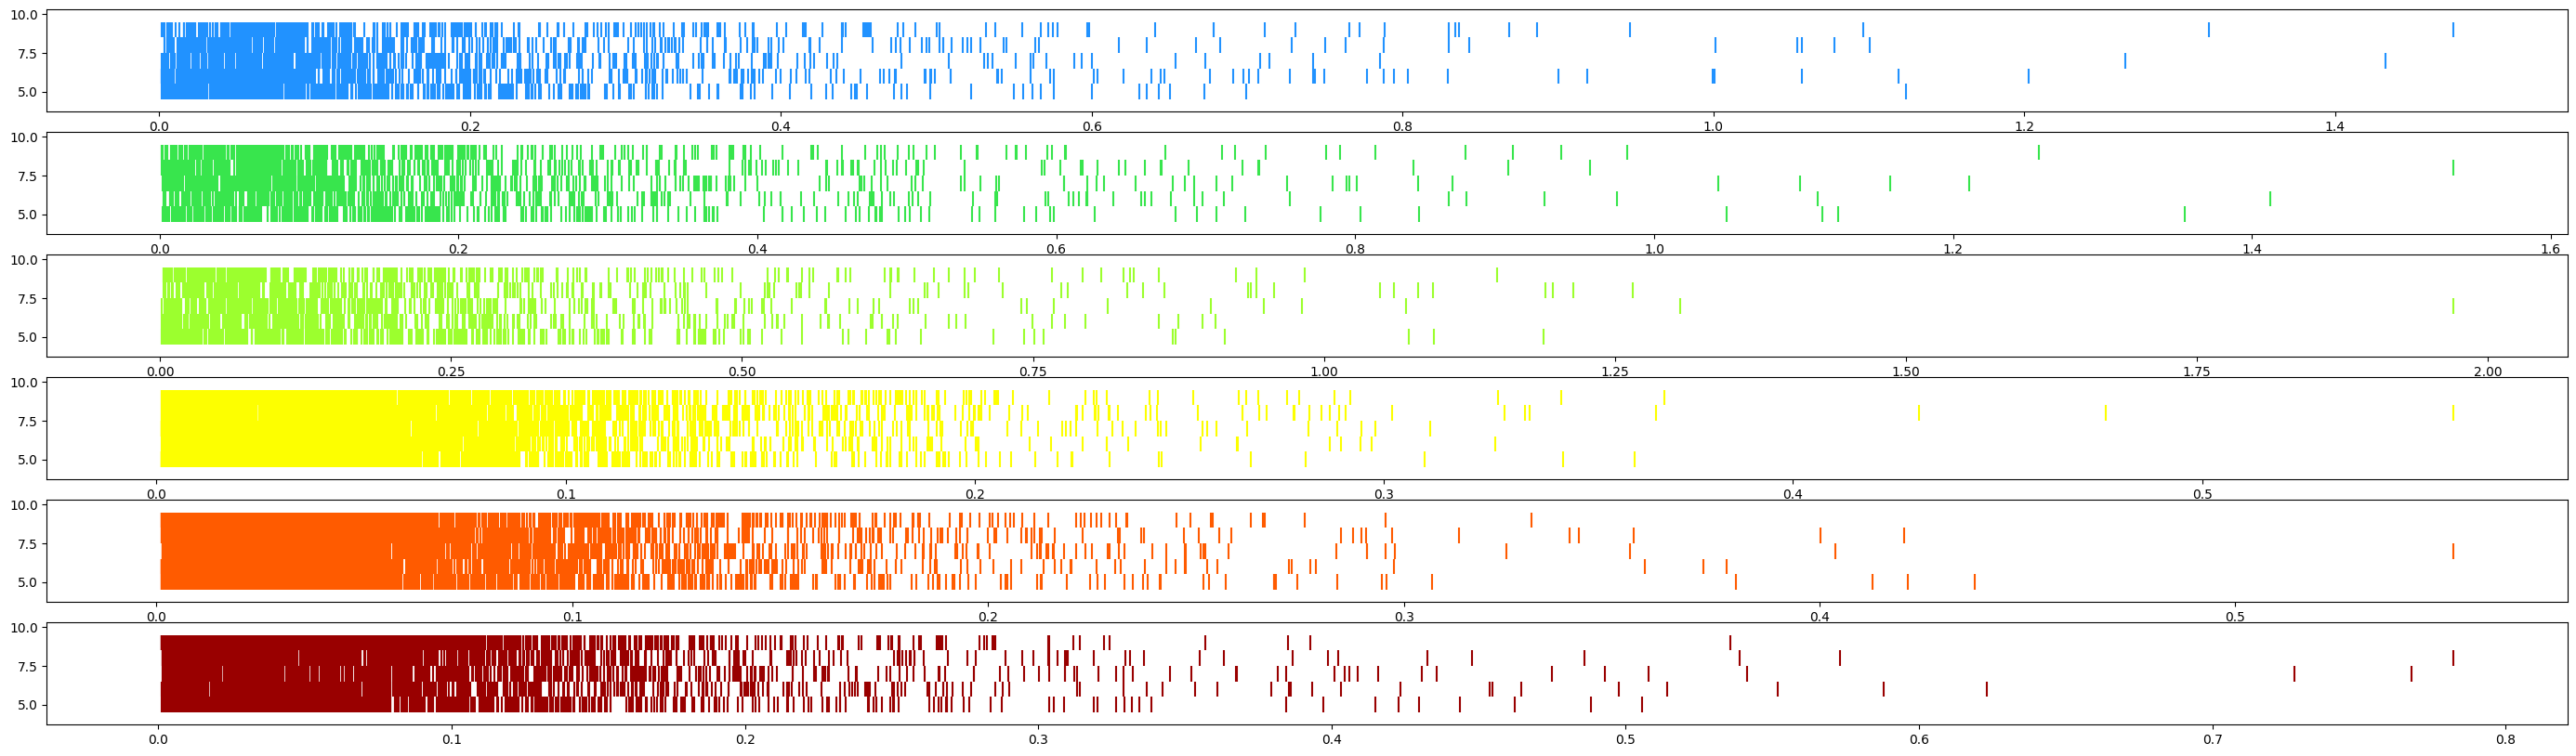

In [167]:
colors = ['2192FF',
          '38E54D',
          '9CFF2E',
          'FDFF00',
          'FF5B00',
          '990000']
fig, ax = plt.subplots(6,figsize=(35,10))
for j in range(6):
    for i in np.arange(0,5):
        #print(j, i+(j*5))
        ax[j].eventplot(np.array(isi[i+(j*5)]), lineoffsets=[i+5], colors='#'+colors[j])

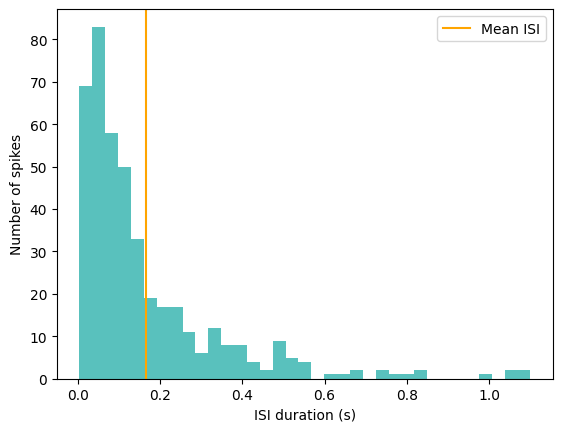

In [224]:
plot_isis(np.array(isi[3]).squeeze())